In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('water.csv')
df

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


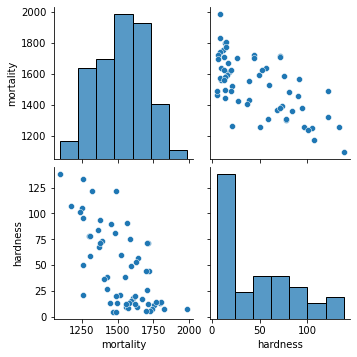

In [4]:
sns.pairplot(df[['mortality','hardness']])

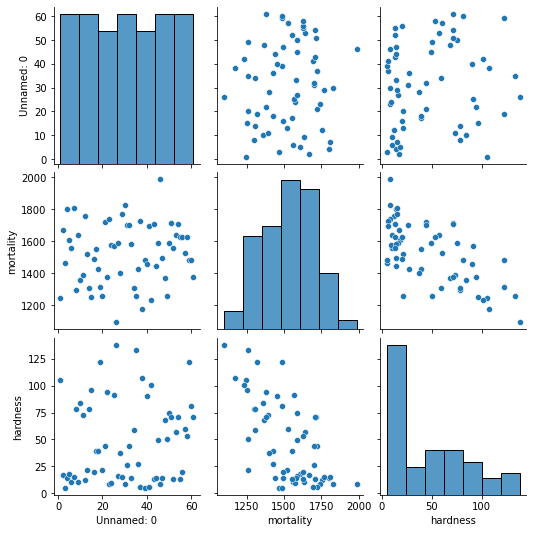

In [5]:
sns.pairplot(df)

Text(0, 0.5, 'смертность')

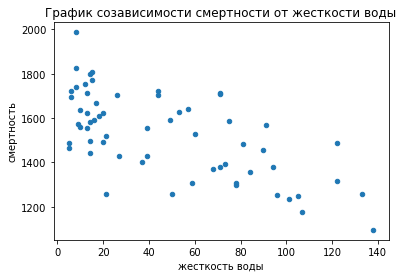

In [6]:
df.plot(kind='scatter', x='hardness', y='mortality', title = 'График созависимости смертности от жесткости воды')
plt.xlabel('жесткость воды')
plt.ylabel('смертность')

In [7]:
#Корреляция между величинами
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [8]:
#Корреляция между величинами по Спирману
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [9]:
#Корреляция между величинами по Кенделлу
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
#Построю моедль линейной регрессии
x = df[['hardness']]
y = df['mortality']

In [12]:
#Разбиваю данные на тестовые и тренировочные. Данных не много, для проверки оставлю 25%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

In [13]:
#Для обучения 45 строк
x_train.shape

(45, 1)

In [14]:
y_train.shape

(45,)

In [15]:
#Обучаю модель
model = LinearRegression()
model.fit(x_train, y_train)  

LinearRegression()

In [16]:
#Подобранные моделью коэффициенты (a)
model.coef_

array([-2.98766687])

In [17]:
#(b)
model.intercept_

1669.3677442560102

In [18]:
#Получаю прогноз на основе тестовых данных
y_pred = model.predict(x_test)
y_pred

array([1511.02140001, 1621.5650743 , 1624.55274117, 1639.49107553,
       1624.55274117, 1466.20639693, 1627.54040804, 1651.44174302,
       1609.61440681, 1639.49107553, 1591.68840557, 1627.54040804,
       1615.58974055, 1519.98440063, 1618.57740742, 1257.06971585])

In [19]:
#Считаю коэффициент детерминации
model.score(x_test, y_test)

0.5586868557072446

Получила модель среднего качества, при другом значении random_state получала значение 0,21!

In [35]:
y_test

57    1627
26    1591
28    1772
5     1558
6     1807
47    1369
32    1581
36    1724
15    1491
8     1637
30    1704
46    1495
4     1609
48    1257
1     1668
25    1096
Name: mortality, dtype: int64

In [23]:
#Считаю остатки
y_leftovers = y_test-y_pred
y_leftovers

57    115.978600
26    -30.565074
28    147.447259
5     -81.491076
6     182.447259
47    -97.206397
32    -46.540408
36     72.558257
15   -118.614407
8      -2.491076
30    112.311594
46   -132.540408
4      -6.589741
48   -262.984401
1      49.422593
25   -161.069716
Name: mortality, dtype: float64

Text(0.5, 1.0, 'График остатков')

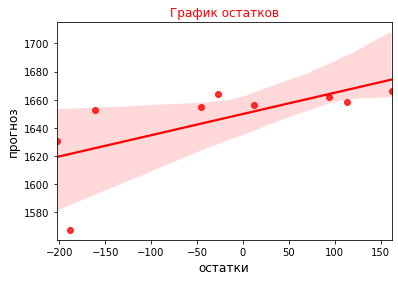

In [74]:
sns.regplot (x = y_leftovers, y = y_pred, data = None, scatter = True, color = 'red')
plt.xlabel('остатки', fontsize=12)
plt.ylabel('прогноз', fontsize=12)
plt.title('График остатков', color="r")


👀Остатки ведут себя хаотично, знаки чередуются, без закономерностей, есть несколько выбросов

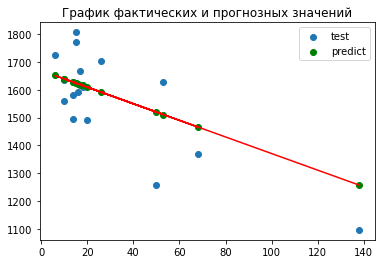

In [37]:
#Визуализирую на одном графике тестовую фактическую выборку (16 значений синего цвета) и прогноз по y на основе тестовых x (зеленые точки на красной линии регрессии).
plt.scatter(x_test, y_test, label='test')
plt.scatter(x_test, y_pred, c='green',  label='predict')
plt.plot(x_test, y_pred, c='red')
plt.title('График фактических и прогнозных значений')
plt.legend()

In [38]:
#Разделю данные в дататфрейме на 2 группы южную и северную
df_South = df[df['location']=='South']
df_North = df[df['location']=='North']
df_North.info()
df_South.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  35 non-null     int64 
 1   location    35 non-null     object
 2   town        35 non-null     object
 3   mortality   35 non-null     int64 
 4   hardness    35 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  26 non-null     int64 
 1   location    26 non-null     object
 2   town        26 non-null     object
 3   mortality   26 non-null     int64 
 4   hardness    26 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.2+ KB


Text(0.5, 1.0, 'Южная часть')

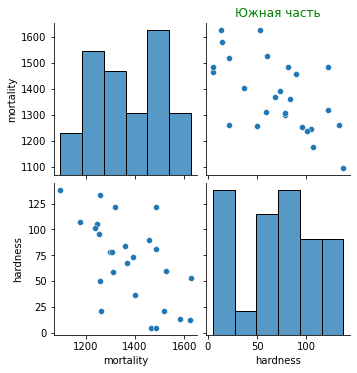

In [39]:
#Анализирую южную часть и северную по отдельности
sns.pairplot(df_South[['mortality','hardness']])
plt.title('Южная часть', color="g")

👀В Южной части данные по величине жесткости распределены более-менее равномерно( кроме значений около 50)

Text(0.5, 1.0, 'Северная часть')

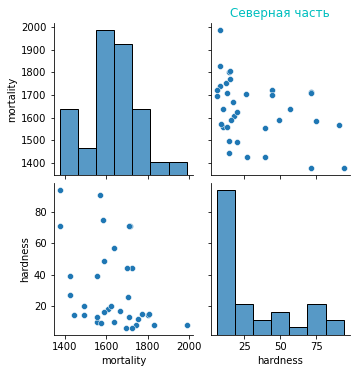

In [25]:
sns.pairplot(df_North[['mortality','hardness']])
plt.title('Северная часть', color="c")

👀В Северной части большая часть значений величины жесткости имеет никзкое значение(<25), о чем свидетельствует гистограмма распределения по hardness

<AxesSubplot:title={'center':'График созависимости смертности от жесткости воды для южной части'}, xlabel='hardness', ylabel='mortality'>

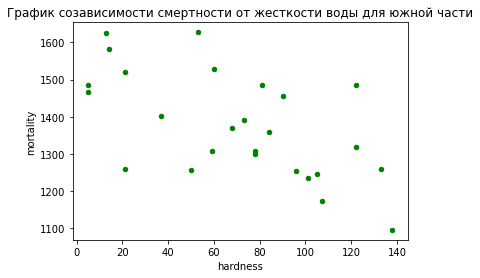

In [40]:
df_South.plot(kind='scatter', x='hardness', y='mortality', title = 'График созависимости смертности от жесткости воды для южной части', color="g")

<AxesSubplot:title={'center':'График созависимости смертности от жесткости воды для северной части'}, xlabel='hardness', ylabel='mortality'>

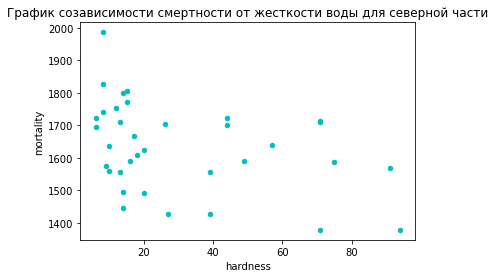

In [41]:
df_North.plot(kind='scatter', x='hardness',  xlabel='жесткость', ylabel='смертность', y='mortality', title = 'График созависимости смертности от жесткости воды для северной части', color="c")
#Почему не подписываются оси?

In [42]:
#Корреляция между величинами по Спирману юг
df_South[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [43]:
#Корреляция между величинами по Спирману север
df_North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


👀В разбивке по регионам получила коэффициент корреляции по Спирману ниже по каждому региону, чем в общем по всем данным. Тем не менее на юге корреляция сильнее, чем на севере

In [44]:
#Корреляция между величинами по Кенделлу юг
df_South[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [45]:
#Корреляция между величинами по Кенделлу север
df_North[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


👀Также и по Кендаллу в разбивке по регионам получила коэффициент корреляции ниже по каждому региону, чем в общем по всем данным. 
Хотя по югу незначительно ниже. Также на юге корреляция выражена сильнее, чем на севере.

In [46]:
#Строю модель линейной регрессии для юга
x_South = df_South[['hardness']]
y_South= df_South['mortality']

In [47]:
#Разбиваю данные на тестовые и тренировочные.
x_train, x_test, y_train, y_test = train_test_split(x_South, y_South, test_size=0.25, random_state=36)

In [48]:
#Для обучения 19 строк
x_train.shape

(19, 1)

In [49]:
y_train.shape

(19,)

In [50]:
#Обучаю модель
model = LinearRegression()
model.fit(x_train, y_train) 

LinearRegression()

In [51]:
#Подобранные моделью коэффициенты (a)
model.coef_

array([-1.95971294])

In [52]:
#(b)
model.intercept_

1521.678802602122

In [53]:
#Получаю прогноз на основе тестовых данных
y_pred = model.predict(x_test)
y_pred

array([1282.59382402, 1511.88023791, 1251.23841699, 1311.9895181 ,
       1388.41832273, 1357.06291571, 1333.54636044])

In [54]:
#Считаю коэффициент детерминации
model.score(x_test, y_test)

0.3191276867282946

Модель низкого качества получилась... Мало данных

In [55]:
#Считаю остатки
y_leftovers = y_test-y_pred

Text(0.5, 1.0, 'График остатков, юг')

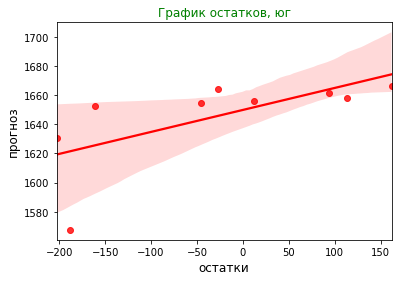

In [73]:
sns.regplot (x = y_leftovers, y = y_pred, data = None, scatter = True, color = 'red')
plt.xlabel('остатки', fontsize=12)
plt.ylabel('прогноз', fontsize=12)
plt.title('График остатков, юг', color="g")


👀Большая часть остатков отрицательны, есть выброс, и коэффициент детерминации потдвердил, что модель низкого качества.

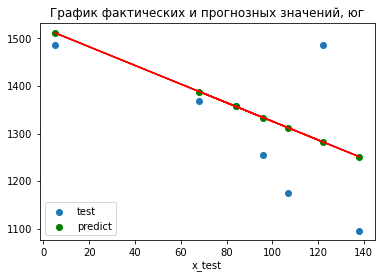

In [57]:
#Визуализирую на одном графике тестовую фактическую выборку (синие точки) и прогноз по y на основе тестовых x (зеленые точки на красной линии регрессии).
plt.scatter(x_test, y_test, label='test')
plt.scatter(x_test, y_pred, c='green', label='predict')
plt.plot(x_test, y_pred, c='red')
plt.title('График фактических и прогнозных значений, юг')
plt.xlabel('x_test')
plt.legend()

In [58]:
#Строю модель линейной регрессии для севера
x_North = df_North[['hardness']]
y_North= df_North['mortality']

In [59]:
#Разбиваю данные на тестовые и тренировочные.
x_train, x_test, y_train, y_test = train_test_split(x_North, y_North, test_size=0.25, random_state=37)

In [60]:
#Для обучения 26 строк
x_train.shape

(26, 1)

In [61]:
y_train.shape

(26,)

In [62]:
#Обучаю модель
model = LinearRegression()
model.fit(x_train, y_train) 

LinearRegression()

In [63]:
#Подобранные моделью коэффициенты (a)
model.coef_

array([-1.14815764])

In [64]:
#(b)
model.intercept_

1675.5045769446112

In [65]:
#Получаю прогноз на основе тестовых данных
y_pred = model.predict(x_test)
y_pred

array([1630.7264289 , 1658.28221231, 1664.02300052, 1655.98589703,
       1661.72668524, 1652.5414241 , 1567.57775859, 1654.83773939,
       1666.31931581])

In [66]:
#Считаю коэффициент детерминации
model.score(x_test, y_test)

0.22813939534190775

👀Очень низкий коэффициент, плохая модель. При random_state=31 коэффициэнт детерминации получила равным -0,06!!!

In [67]:
#Считаю остатки
y_leftovers = y_test-y_pred

Text(0.5, 1.0, 'График остатков, север')

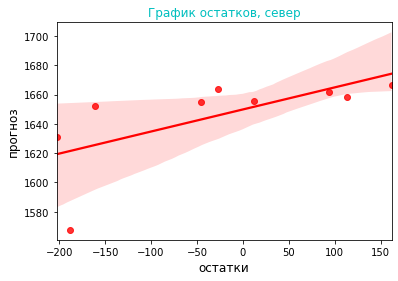

In [72]:
sns.regplot (x = y_leftovers, y = y_pred, data = None, scatter = True, color = 'red')
plt.xlabel('остатки', fontsize=12)
plt.ylabel('прогноз', fontsize=12)
plt.title('График остатков, север', color="c")

👀Есть положительные и отрицательные остатки, но также есть выброс. Мало данных и выброс - низкий коэффициент детерминации - модель плохого качества.

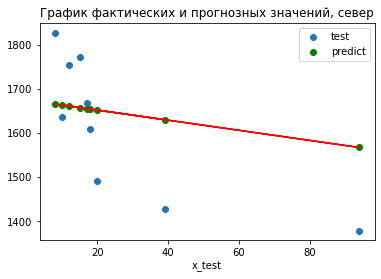

In [69]:
#Визуализирую на одном графике тестовую фактическую выборку (синие точки) и прогноз по y на основе тестовых x (зеленые точки на красной линии регрессии).
plt.scatter(x_test, y_test, label='test')
plt.scatter(x_test, y_pred, c='green', label='predict')
plt.plot(x_test, y_pred, c='red')
plt.title('График фактических и прогнозных значений, север')
plt.xlabel('x_test')
plt.legend()